# Titanic
듀토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것이다.

- 변수 알아보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn')  
sns.set(font_scale=2.5)  #plot의 사이즈 2.5

import missingno as msno  #데이터셋의 채워지지 않은 null data

#ignore warnings
import warnings  
warnings.filterwarnings('ignore') #warning 무시하기

%matplotlib inline

> 라이브러리를 불러온다

## 1. Dataset 확인

In [2]:
filepath = os.getenv('HOME')+'/aiffel/Kaggle/Titanic/' 
df_train=pd.read_csv('./train.csv')
df_test=pd.read_csv('./test.csv')

> 파일 경로를 지정해주고 train/test 파일을 불러온다.

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> 우리가 다루는 문제에서 feature는 Pclass,Age,SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

- PassengerId
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


pandas dataframe 에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해준다.

- count : 
- mean : 평균
- std : 표준편차
- min : 최솟값
- 25% : 1사분위수
- 50% : 2사분위수
- 75% : 3사분위수
- max : 최댓값

In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check

In [6]:
for col in df_train.columns:
    msg =  'colunm: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

colunm: PassengerId	 Percent of NaN value: 0.00%
colunm:   Survived	 Percent of NaN value: 0.00%
colunm:     Pclass	 Percent of NaN value: 0.00%
colunm:       Name	 Percent of NaN value: 0.00%
colunm:        Sex	 Percent of NaN value: 0.00%
colunm:        Age	 Percent of NaN value: 19.87%
colunm:      SibSp	 Percent of NaN value: 0.00%
colunm:      Parch	 Percent of NaN value: 0.00%
colunm:     Ticket	 Percent of NaN value: 0.00%
colunm:       Fare	 Percent of NaN value: 0.00%
colunm:      Cabin	 Percent of NaN value: 77.10%
colunm:   Embarked	 Percent of NaN value: 0.22%


- 이스케이프 코드
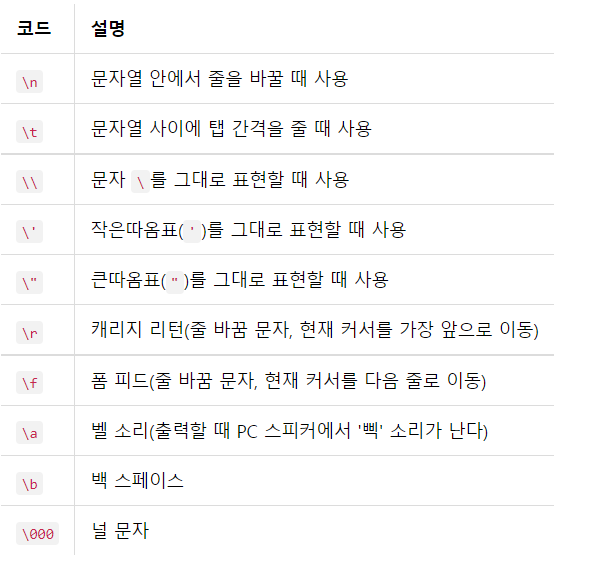

- {:>10} : 왼쪽 정렬
- {:.2f}%

In [7]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


In [8]:
df_test[col].shape[0]

418

In [9]:
df_test[col]

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

- 

<AxesSubplot:>

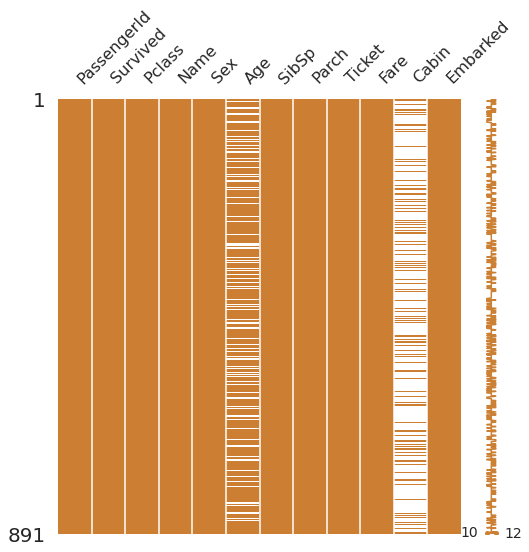

In [10]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

> MSNO 라는 라이브러리를 사용하면 null data의 존재를 쉽게 볼 수 있다.

<AxesSubplot:>

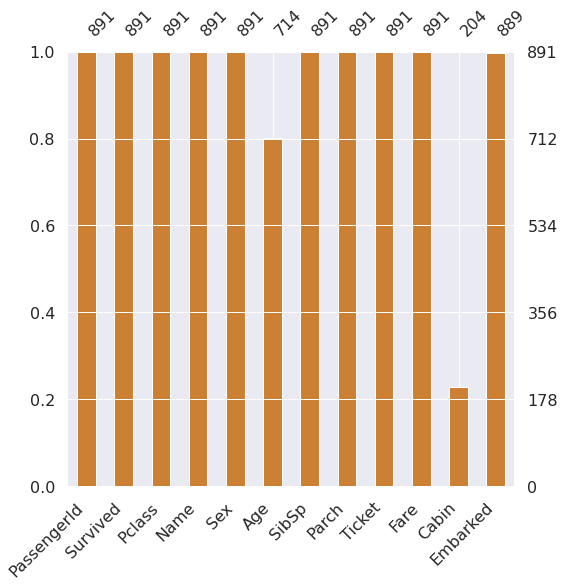

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

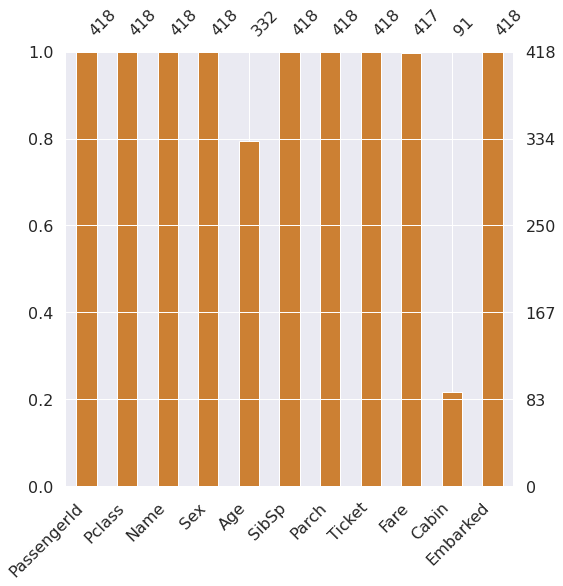

In [12]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2 Target label 확인
- target label이 어떤 distribution 을 가지고 있는지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

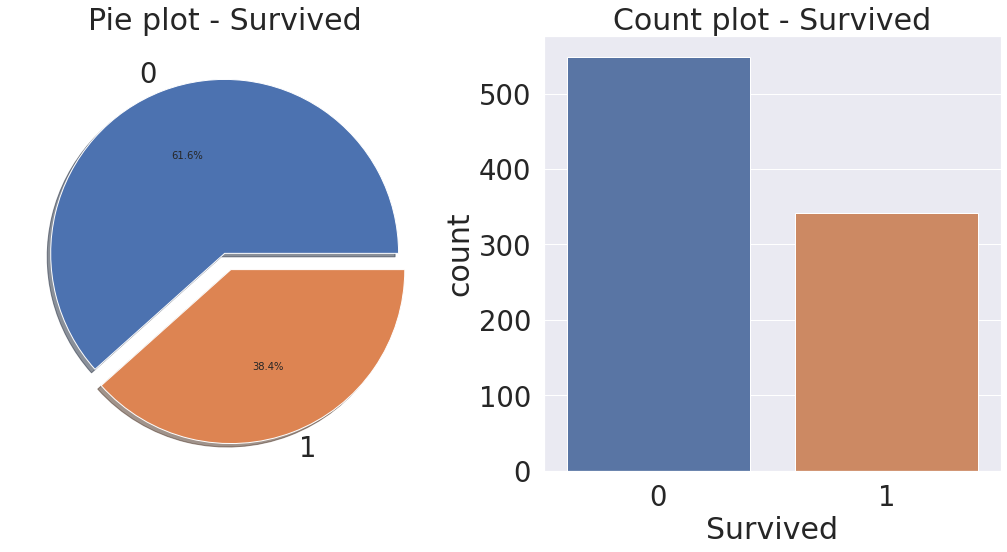

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))  #(1,2)의 plot을 나타내겠다./#행길이-18,열길이-8

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') #y레이블을 없앰
sns.countplot('Survived', data=df_train, ax=ax[1]) #count로 해준 plot
ax[1].set_title('Count plot - Survived')

plt.show()

In [14]:
df_train['Survived'].value_counts()  #각 레이블 값의 개수

0    549
1    342
Name: Survived, dtype: int64

In [15]:
type(df_train['Survived'].value_counts())  #series들은 plot을 가지고 있다.

pandas.core.series.Series

<AxesSubplot:ylabel='Survived'>

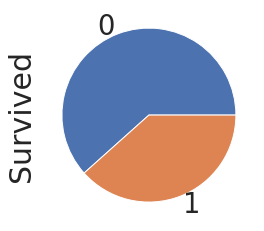

In [16]:
df_train['Survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='Survived'>

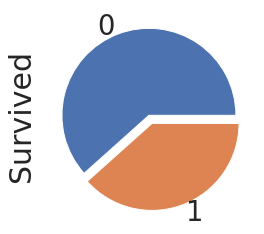

In [17]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1]) #제대로 분리

<AxesSubplot:ylabel='Survived'>

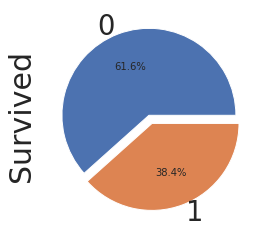

In [18]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%') #비율표시

In [19]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0])

<AxesSubplot:title={'center':'Pie plot - Survived'}, ylabel='Survived'>

In [20]:
ax #첫번째 꺼, 두번째 꺼

array([<AxesSubplot:title={'center':'Pie plot - Survived'}, ylabel='Survived'>,
       <AxesSubplot:title={'center':'Count plot - Survived'}, xlabel='Survived', ylabel='count'>],
      dtype=object)

# 2. Exploratory data analysis
- 데이터분석 시작
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하기

## 2-1 Pclass
- Pclass 는 ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터 타입
- pandas dataframe 에서는 groupby를 사용하면 쉽게 할 수 있다. 또한, pivot이라는 메소드도 있다.

In [21]:
df_train.shape

(891, 12)

In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [23]:
df_train[['Pclass','Survived']] #리스트로 묶기

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [24]:
df_train[['Pclass','Survived']].groupby(['Pclass'])  #Pclass 별로 그룹화 해줌

In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count() #각 class 에 몇명이 있는 지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum() #216 명중 생존한사람의 총합

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='ocean')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=False) #all차이

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [29]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [30]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


<AxesSubplot:xlabel='Pclass'>

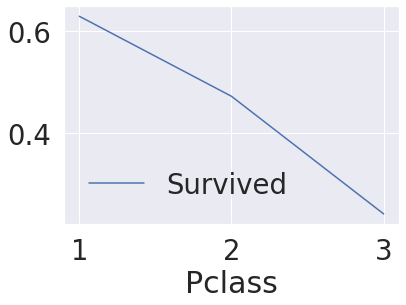

In [31]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot() #내림차순

<AxesSubplot:>

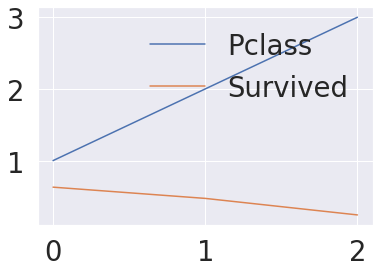

In [32]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot() #내림차순

<AxesSubplot:xlabel='Pclass'>

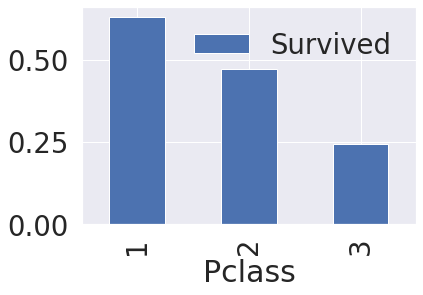

In [33]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar() #내림차순

In [34]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False) #내림차순/각 클래스별 생존률을 나타냄

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


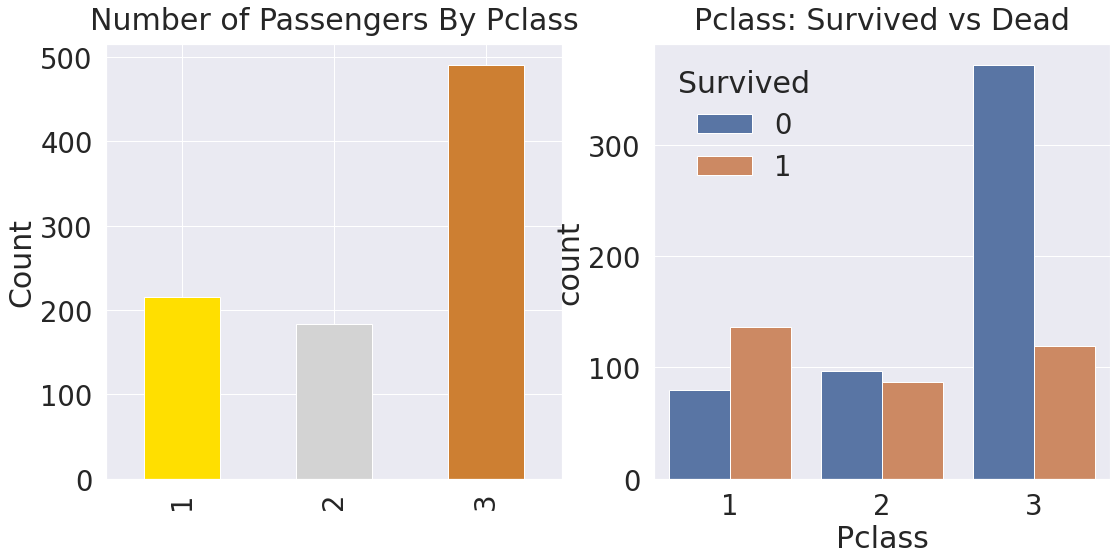

In [35]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) #hue=색깔로 구분
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- First class일수록 생존할 확률이 더 높았다                                                        

## 2.2 Sex
- 성별로 생존률이 어떻게 달라지는 지 확인
- pandas groupby 와 seaborn countplot을 사용해서 시각화

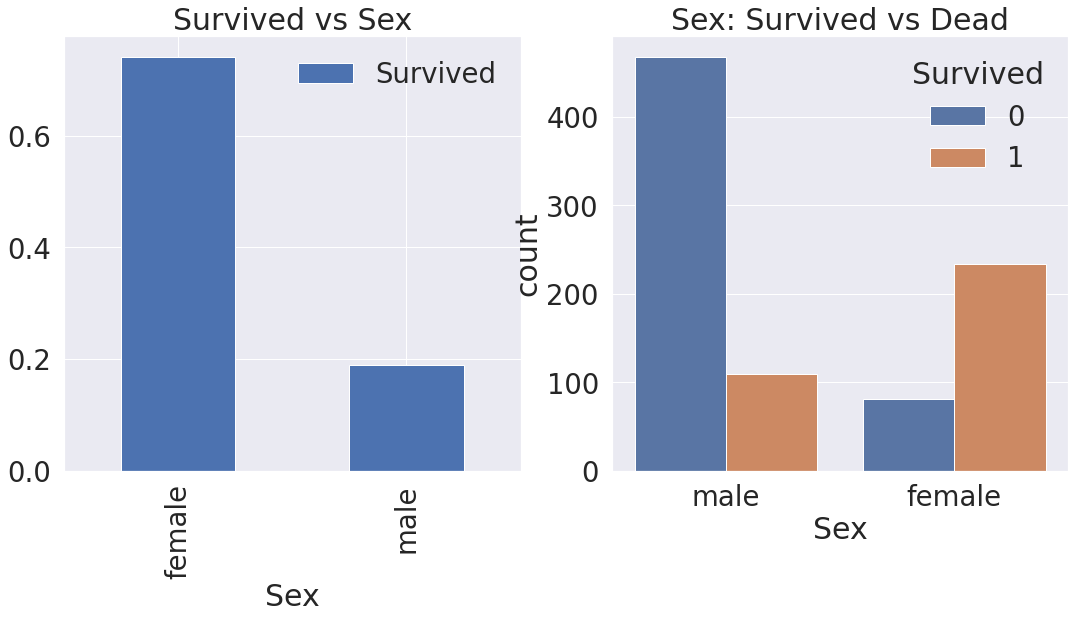

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여자의 생존률이 더 높은 것을 확인할 수 있다.

In [37]:
df_train[['Sex', 'Survived']].groupby(['Sex'])

In [38]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [43]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [44]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인
- seaborn 의 factorplot을 이용하면 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

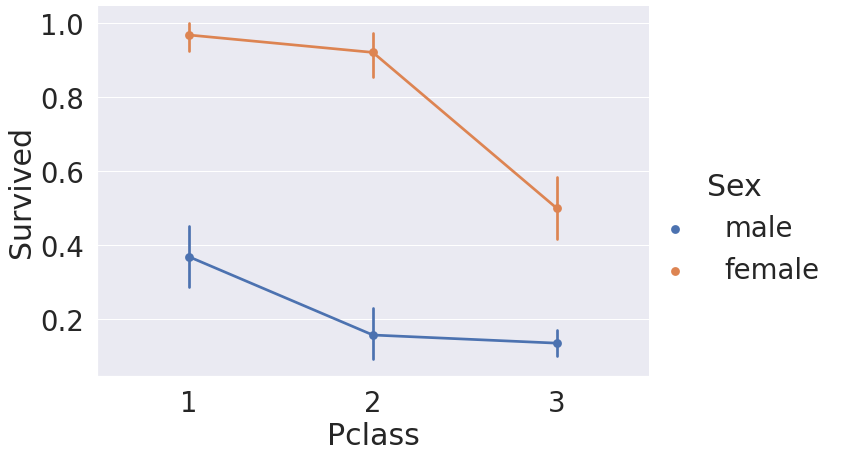

In [45]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)  #hue=sex이므로 성별로 나눔

- survived가 male의 경우 대략 40%/ female의 경우 90%인 것을 알 수 있다.
- 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있다.
- 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다.

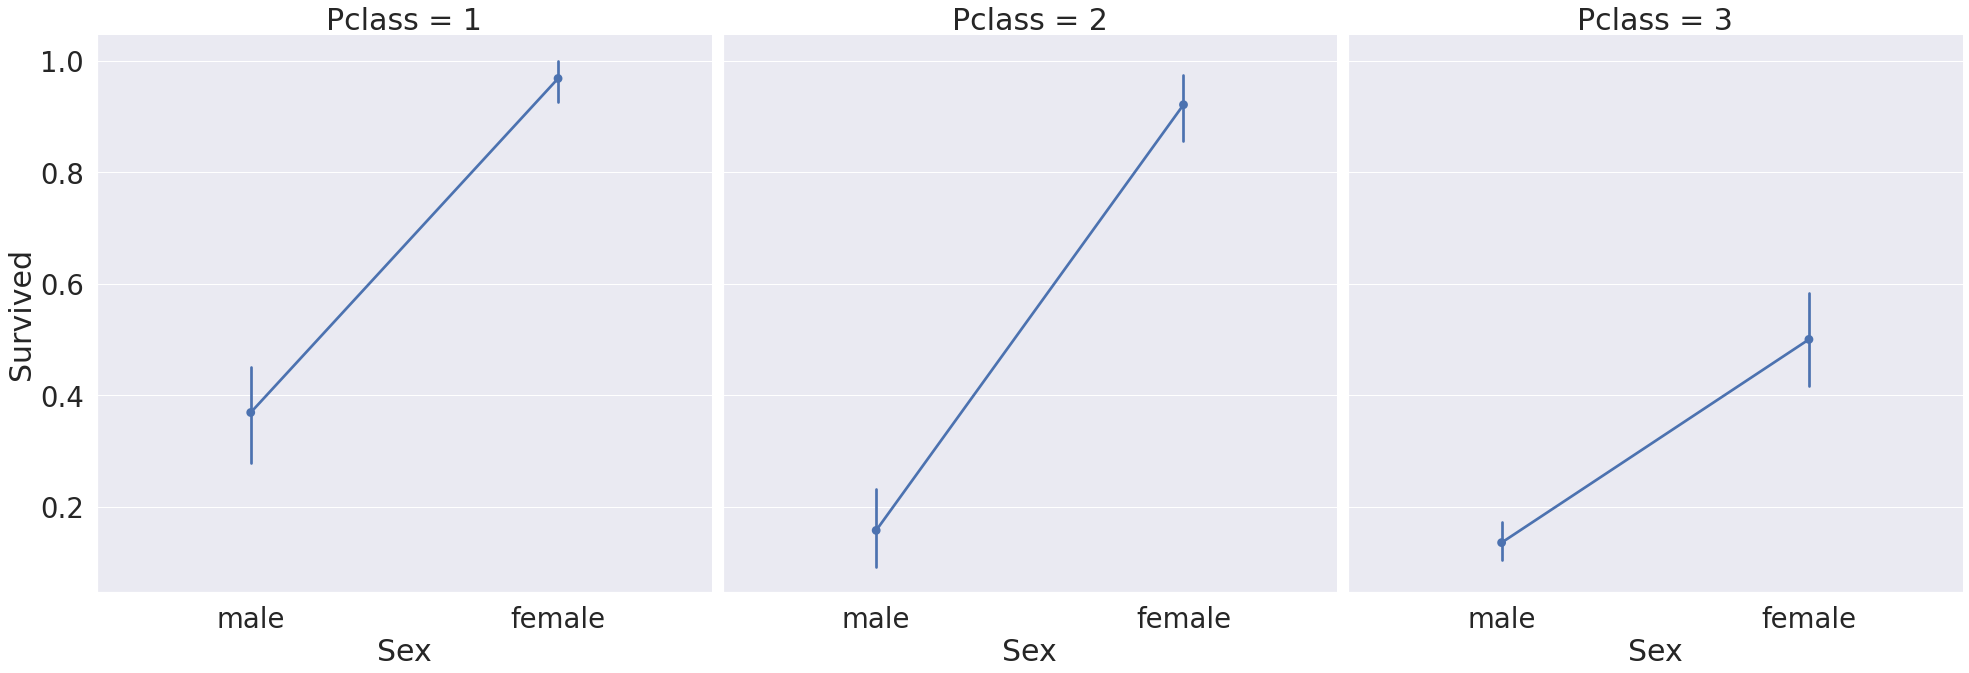

In [46]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)
#colum 별로 나눔

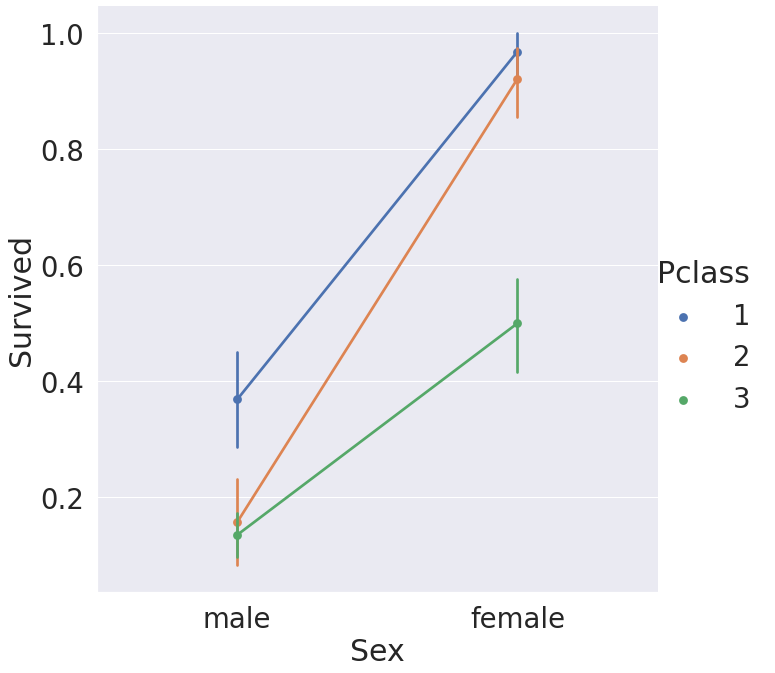

In [47]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, satureation=.5, size=9, aspect=1)
#colum 별로 나눔

## 2.4 Age


In [48]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))#나이 최댓값
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min())) # 나이 최솟값
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean())) # 평균 나이

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [49]:
foo = df_train['Age']

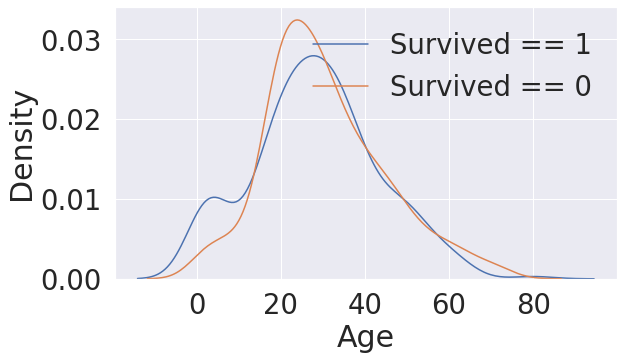

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) #히스토그램을 부드럽게 그린 것
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이가 어릴수록 생존할 확률이 높았다.

### 커널 밀도 추정(KDE: Kernel Density Estimator)
분포를 확인할 때 히스토그램을 많이 활용하는데 구간을 어떻게 설정하느냐에 따라서 결과물이 매우 달라져서, 엉뚱한 결론과 해석을 내릴 수 있기 때문에 조심해야 한다. 그래서 그 대안으로 _커널 밀도 추정_ 을 쓴다.
- 히스토그램같은 분포를 부드럽게 곡선화 시켜준다.
- seaborn에서 sns.kdeplot() 사용

<AxesSubplot:>

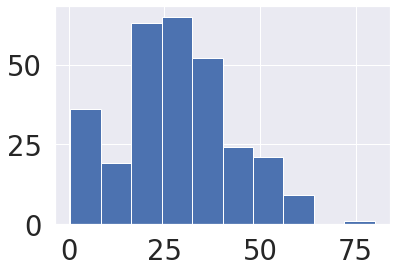

In [52]:
df_train[df_train['Survived']==1]['Age'].hist() #히스토그램으로 데이터들의 분포확인

In [54]:
df_train.iloc[0, :]  #pandas 의 인덱싱 하는 방법

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                              22.00
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [55]:
for row in df_train.iterrows():  #인덱싱 하는 방법
    break

In [56]:
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                              22.00
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [57]:
df_train['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [58]:
df_train[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


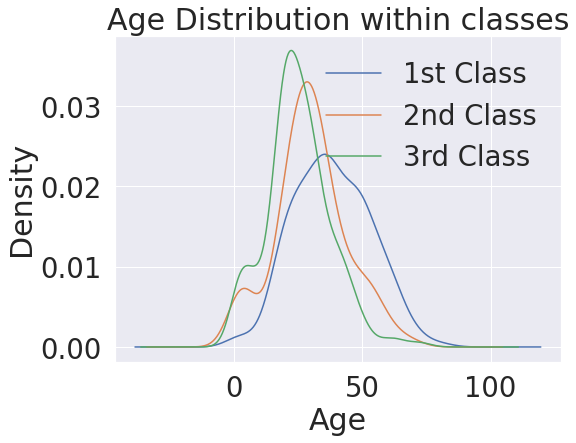

In [63]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- class 가 높을 수록 나이 많은 사람의 비중이 커짐

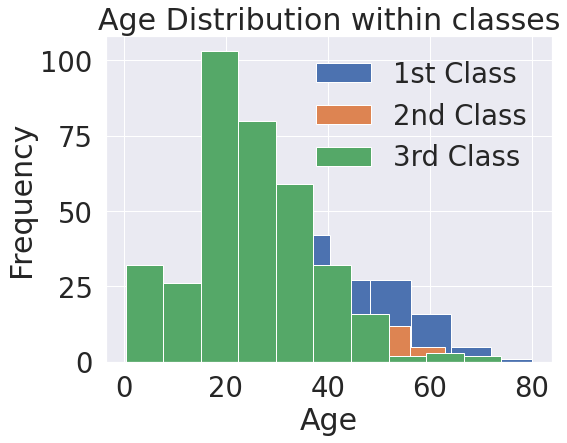

In [64]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

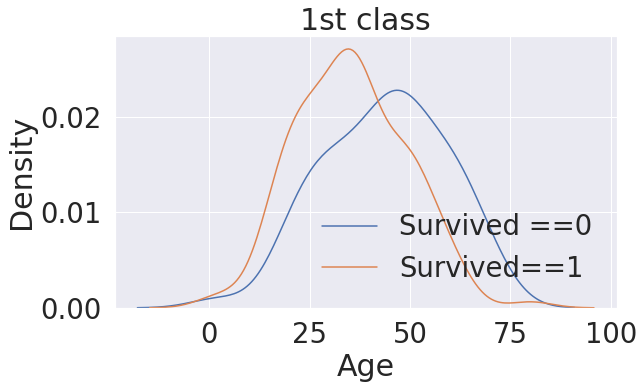

In [72]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'],ax=ax)
plt.legend(['Survived ==0','Survived==1'])
plt.title('1st class')
plt.show()

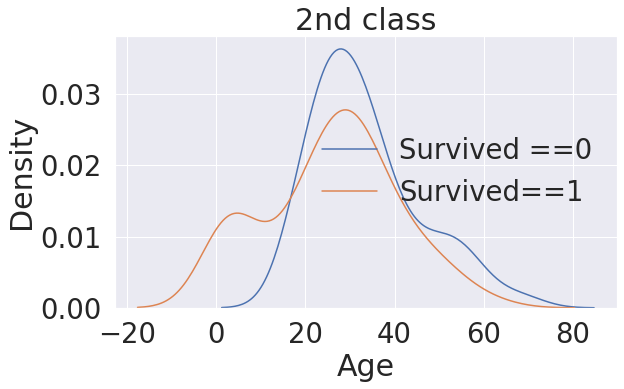

In [74]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==2)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==2)]['Age'],ax=ax)
plt.legend(['Survived ==0','Survived==1'])
plt.title('2nd class')
plt.show()

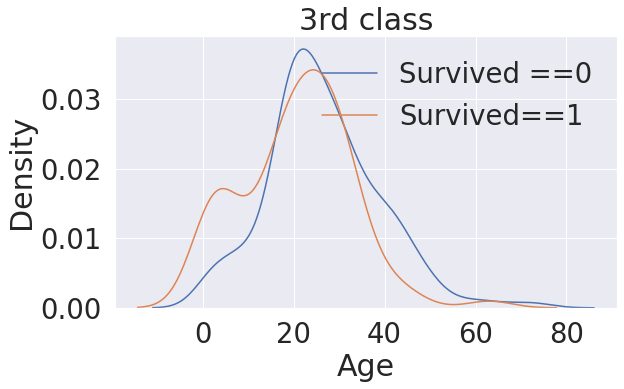

In [75]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==3)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==3)]['Age'],ax=ax)
plt.legend(['Survived ==0','Survived==1'])
plt.title('3rd class')
plt.show()

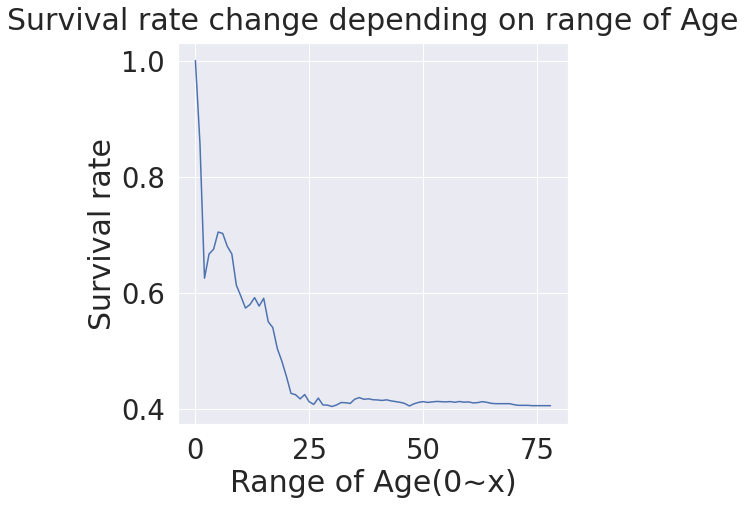

In [76]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 확실히 높아지는 것을 확인할 수 있다.
- 나이가 중요한 feature로 쓰일 수 있음을 확인.

In [81]:
i=10 #10살 미만의 사람들 중에서 몇명이나 생존했는지
df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516